In [2]:
%matplotlib inline

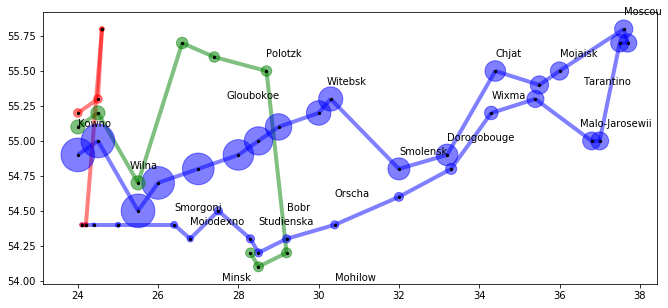

In [3]:
# Author: Aric Hagberg (hagberg@lanl.gov)

#    Copyright (C) 2006-2018 by
#    Aric Hagberg <hagberg@lanl.gov>
#    Dan Schult <dschult@colgate.edu>
#    Pieter Swart <swart@lanl.gov>
#    All rights reserved.
#    BSD license.

import matplotlib.pyplot as plt
import networkx as nx


def minard_graph():
    data1 = """\
24.0,54.9,340000,A,1
24.5,55.0,340000,A,1
25.5,54.5,340000,A,1
26.0,54.7,320000,A,1
27.0,54.8,300000,A,1
28.0,54.9,280000,A,1
28.5,55.0,240000,A,1
29.0,55.1,210000,A,1
30.0,55.2,180000,A,1
30.3,55.3,175000,A,1
32.0,54.8,145000,A,1
33.2,54.9,140000,A,1
34.4,55.5,127100,A,1
35.5,55.4,100000,A,1
36.0,55.5,100000,A,1
37.6,55.8,100000,A,1
37.7,55.7,100000,R,1
37.5,55.7,98000,R,1
37.0,55.0,97000,R,1
36.8,55.0,96000,R,1
35.4,55.3,87000,R,1
34.3,55.2,55000,R,1
33.3,54.8,37000,R,1
32.0,54.6,24000,R,1
30.4,54.4,20000,R,1
29.2,54.3,20000,R,1
28.5,54.2,20000,R,1
28.3,54.3,20000,R,1
27.5,54.5,20000,R,1
26.8,54.3,12000,R,1
26.4,54.4,14000,R,1
25.0,54.4,8000,R,1
24.4,54.4,4000,R,1
24.2,54.4,4000,R,1
24.1,54.4,4000,R,1"""
    data2 = """\
24.0,55.1,60000,A,2
24.5,55.2,60000,A,2
25.5,54.7,60000,A,2
26.6,55.7,40000,A,2
27.4,55.6,33000,A,2
28.7,55.5,33000,R,2
29.2,54.2,30000,R,2
28.5,54.1,30000,R,2
28.3,54.2,28000,R,2"""
    data3 = """\
24.0,55.2,22000,A,3
24.5,55.3,22000,A,3
24.6,55.8,6000,A,3
24.6,55.8,6000,R,3
24.2,54.4,6000,R,3
24.1,54.4,6000,R,3"""
    cities = """\
24.0,55.0,Kowno
25.3,54.7,Wilna
26.4,54.4,Smorgoni
26.8,54.3,Moiodexno
27.7,55.2,Gloubokoe
27.6,53.9,Minsk
28.5,54.3,Studienska
28.7,55.5,Polotzk
29.2,54.4,Bobr
30.2,55.3,Witebsk
30.4,54.5,Orscha
30.4,53.9,Mohilow
32.0,54.8,Smolensk
33.2,54.9,Dorogobouge
34.3,55.2,Wixma
34.4,55.5,Chjat
36.0,55.5,Mojaisk
37.6,55.8,Moscou
36.6,55.3,Tarantino
36.5,55.0,Malo-Jarosewii"""

    c = {}
    for line in cities.split('\n'):
        x, y, name = line.split(',')
        c[name] = (float(x), float(y))

    g = []

    for data in [data1, data2, data3]:
        G = nx.Graph()
        i = 0
        G.pos = {}  # location
        G.pop = {}  # size
        last = None
        for line in data.split('\n'):
            x, y, p, r, n = line.split(',')
            G.pos[i] = (float(x), float(y))
            G.pop[i] = int(p)
            if last is None:
                last = i
            else:
                G.add_edge(i, last, **{r: int(n)})
                last = i
            i = i + 1
        g.append(G)

    return g, c


if __name__ == "__main__":

    (g, city) = minard_graph()

    plt.figure(1, figsize=(11, 5))
    plt.clf()
    colors = ['b', 'g', 'r']
    for G in g:
        c = colors.pop(0)
        node_size = [int(G.pop[n] / 300.0) for n in G]
        nx.draw_networkx_edges(G, G.pos, edge_color=c, width=4, alpha=0.5)
        nx.draw_networkx_nodes(G, G.pos, node_size=node_size, node_color=c, alpha=0.5)
        nx.draw_networkx_nodes(G, G.pos, node_size=5, node_color='k')

    for c in city:
        x, y = city[c]
        plt.text(x, y + 0.1, c)
    plt.show()